# Tree Models

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn import model_selection as ms

sklearn.set_config(print_changed_only=False)

from matplotlib import pyplot as plt

import import_ipynb
from _Self_Written_Functions_Sheet import rmse

importing Jupyter notebook from _Self_Written_Functions_Sheet.ipynb


In [2]:
hp_full_strd = pd.read_csv('..\hp_full_strd.csv', index_col=0)
hp_full_strd

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,TotalBaths,BsmtBaths,BsmtFinTotalSF,BsmtUnfin,2ndFlr,LowQualFin,TotalPorchSF,Porches,Decks,YrsRemodToSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MSSubClass_20.0,MSSubClass_30.0,MSSubClass_40.0,MSSubClass_45.0,MSSubClass_50.0,MSSubClass_60.0,MSSubClass_70.0,MSSubClass_75.0,MSSubClass_80.0,MSSubClass_85.0,MSSubClass_90.0,MSSubClass_120.0,MSSubClass_1

In [3]:
hp_logsaleprice = pd.read_csv('..\hp_logsaleprice.csv', index_col=0)
hp_logsaleprice

,SalePrice
0,12.247694
1,12.109011
2,12.317167
3,11.849398
4,12.429216
...,...
1453,12.072541
1454,12.254863
1455,12.493130
1456,11.864462


# RANDOM FOREST

In [4]:
state = 0

# setting up train_full and test_full sets
xtrain_rfr_full, xtest_rfr_full, ytrain_rfr_full, ytest_rfr_full = ms.train_test_split(hp_full_strd,
                                                                                   hp_logsaleprice,
                                                                                   test_size=0.2,
                                                                                   random_state=state)

# Must flatten to fit
ytrain_rfr_full = ytrain_rfr_full.values.flatten()

rfr = RandomForestRegressor()

# using standard kfold split
n_folds = ms.KFold(n_splits=5, random_state=state, shuffle=True)

### using full dataset

In [5]:
train_scores = []
test_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

# parameters to use
maxdepth = [10, 25, 50, 100, 250, 500]
minsamlf = [1, 2, 3, 4, 5]
minsamsplt = [2, 3, 4, 5]
nestimators = [100, 250, 400, 500]
oobscore = [True, False]
warmstart = [True, False]

gparam_rfr = {'max_depth': maxdepth,
              'min_samples_leaf': minsamlf,
              'min_samples_split': minsamsplt,
              'n_estimators': nestimators,
              'oob_score': oobscore,
              'warm_start': warmstart}

# setting parameters
gs_rfr_full = ms.GridSearchCV(rfr, gparam_rfr, cv=n_folds, refit=True, n_jobs=-1,
                           scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_rfr_full.fit(xtrain_rfr_full, ytrain_rfr_full)

# setting up dataframe for results
train_scores.append(gs_rfr_full.best_estimator_.score(xtrain_rfr_full, ytrain_rfr_full))
test_scores.append(gs_rfr_full.best_estimator_.score(xtest_rfr_full, ytest_rfr_full))

# use rmse function from Self_Written_Functions_Sheet_Recover
train_rmse.append(rmse(gs_rfr_full, ytrain_rfr_full, xtrain_rfr_full))
test_rmse.append(rmse(gs_rfr_full, ytest_rfr_full, xtest_rfr_full))

# add the best parameters to the df
best_par_list.append(gs_rfr_full.best_params_)

# find the difference btwn the rmses
diff_rmse = np.subtract(train_rmse, test_rmse)

# create dataframe
rfr_list_results = [train_scores, test_scores, train_rmse, test_rmse, diff_rmse]
rfr_res_df = pd.DataFrame(rfr_list_results).T
rfr_res_df.columns = ['TrainScores', 'TestScores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']
best_par_df = pd.DataFrame(best_par_list)
rfr_res_df = pd.concat([rfr_res_df, best_par_df], axis=1, sort=False)

rfr_res_df

Wall time: 23min 30s


,TrainScores,TestScores,TrainRMSE,TestRMSE,DiffRMSE,max_depth,min_samples_leaf,min_samples_split,n_estimators,oob_score,warm_start
0,0.96955,0.910951,0.069164,0.122847,-0.053683,10,2,3,100,False,False


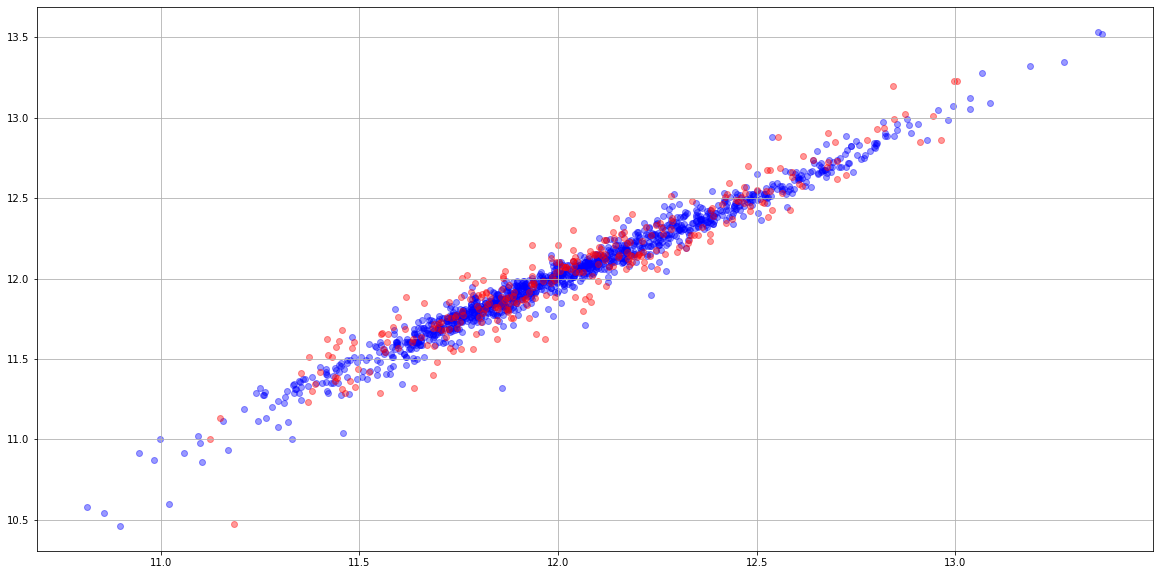

In [6]:
plt.figure(figsize=(20, 10))
plt.scatter(gs_rfr_full.best_estimator_.predict(xtrain_rfr_full), ytrain_rfr_full, color='blue', alpha=0.4)
plt.scatter(gs_rfr_full.best_estimator_.predict(xtest_rfr_full), ytest_rfr_full, color='red', alpha=0.4)
plt.grid(which='both')

In [7]:
train_scores = []
test_scores = []
train_rmse = []
test_rmse = []
best_par_list = []


# parameters to use
maxdepth = [500]
minsamlf = [2]
minsamsplt = [3]
nestimators = [500]
oobscore = [False]
warmstart = [False]

gparam_rfr = {'max_depth': maxdepth,
              'min_samples_leaf': minsamlf,
              'min_samples_split': minsamsplt,
              'n_estimators': nestimators,
              'oob_score': oobscore,
              'warm_start': warmstart}

# setting parameters
gs_rfr_full_2 = ms.GridSearchCV(rfr, gparam_rfr, cv=n_folds, refit=True, n_jobs=-1,
                           scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_rfr_full_2.fit(xtrain_rfr_full, ytrain_rfr_full)

# setting up dataframe for results
train_scores.append(gs_rfr_full_2.best_estimator_.score(xtrain_rfr_full, ytrain_rfr_full))
test_scores.append(gs_rfr_full_2.best_estimator_.score(xtest_rfr_full, ytest_rfr_full))

# use rmse function from Self_Written_Functions_Sheet_Recover
train_rmse.append(rmse(gs_rfr_full_2, ytrain_rfr_full, xtrain_rfr_full))
test_rmse.append(rmse(gs_rfr_full_2, ytest_rfr_full, xtest_rfr_full))

# add the best parameters to the df
best_par_list.append(gs_rfr_full_2.best_params_)

# find the difference btwn the rmses
diff_rmse = np.subtract(train_rmse, test_rmse)

# create dataframe
rfr_list_results = [train_scores, test_scores, train_rmse, test_rmse, diff_rmse]
rfr_res_df = pd.DataFrame(rfr_list_results).T
rfr_res_df.columns = ['TrainScores', 'TestScores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']
best_par_df = pd.DataFrame(best_par_list)
rfr_res_df = pd.concat([rfr_res_df, best_par_df], axis=1, sort=False)

rfr_res_df

Wall time: 12.3 s


,TrainScores,TestScores,TrainRMSE,TestRMSE,DiffRMSE,max_depth,min_samples_leaf,min_samples_split,n_estimators,oob_score,warm_start
0,0.974526,0.912423,0.063261,0.121828,-0.058567,500,2,3,500,False,False


# parameters to use for full dataset from gs_rfr_full_2
- maxdepth = [500]
- minsamlf = [2]
- minsamsplt = [3]
- nestimators = [500]
- oobscore = [False]
- warmstart = [False]

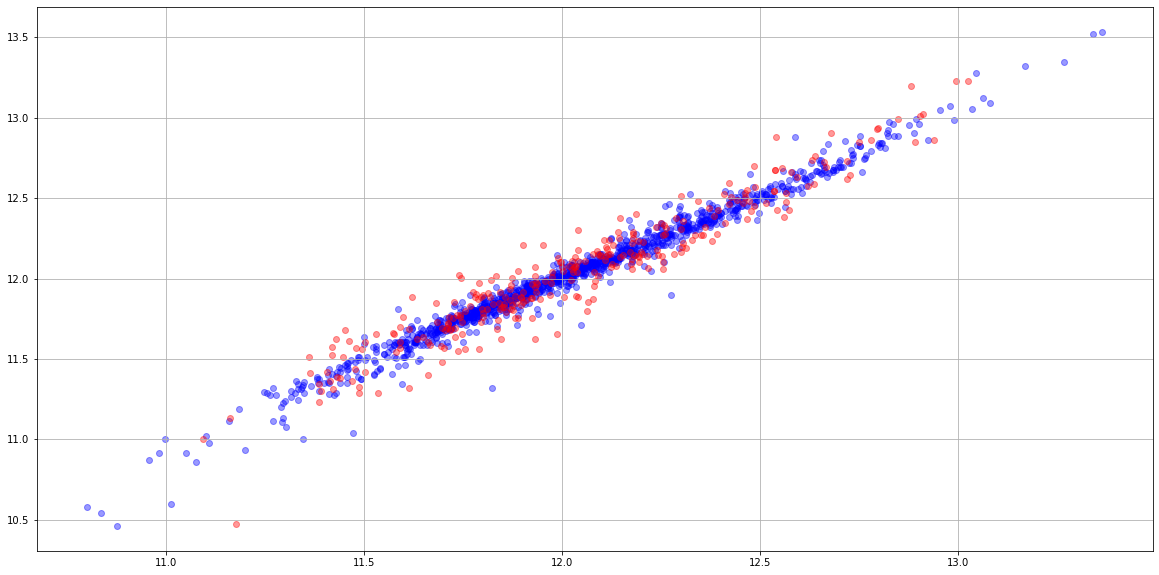

In [8]:
plt.figure(figsize=(20, 10))
plt.scatter(gs_rfr_full_2.best_estimator_.predict(xtrain_rfr_full), ytrain_rfr_full, color='blue', alpha=0.4)
plt.scatter(gs_rfr_full_2.best_estimator_.predict(xtest_rfr_full), ytest_rfr_full, color='red', alpha=0.4)
plt.grid(which='both')

### using lasso reduced dataset

In [9]:
hp_lasso_strd_reduced = pd.read_csv('..\hp_lasso_strd_reduced.csv', index_col=0)
hp_lasso_strd_reduced

,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,GrLivArea,BsmtFullBath,HalfBath,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,ScreenPorch,TotalBaths,BsmtFinTotalSF,LowQualFin,TotalPorchSF,Porches,Decks,YrsRemodToSold,MSZoning_FV,MSZoning_RL,Street_Pave,LotShape_IR2,LotConfig_CulDSac,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Veenker,Condition1_Norm,Condition1_RRAe,BldgType_Duplex,BldgType_Twnhs,RoofStyle_Gable,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_HdBoard,Exterior1st_VinylSd,Exterior1st_Wd Sdng,MasVnrType_Stone,ExterQual_Fa,ExterQual_TA,ExterCond_Fa,ExterCond_TA,Foundation_PConc,Foundation_Wood,BsmtQual_TA,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_No,BsmtFinType1_GLQ,BsmtFinType1_Rec,BsmtFinType2_BLQ,HeatingQC_Gd,HeatingQC_TA,CentralAir_Y,KitchenQual_TA,Functional_Maj2,Functional_Sev,Functional_Typ,GarageType_Basment,GarageType_CarPort,GarageFinish_Unf,GarageQual_Gd,GarageCond_Fa,PavedDrive_Y,SaleType_CWD,SaleType_ConLI,SaleType_New,SaleCondition_Normal,SaleCondition_Partial,MSSubClass_30.0,MSSubClass_70.0,MSSubClass_90.0,MSSubClass_160.0,LotFrontage
0,0.015398,0.029344,0.023029,0.026608,0.024858,0.029998,0.019815,0.018420,0.028104,0.039163,0.041487,0.024485,0.031232,0.000000,0.027315,0.027731,0.000000,0.019967,0.0,0.035089,0.027808,0.0,0.011747,0.031623,0.000000,0.004240,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.023186
1,0.017494,0.025152,0.036846,0.026250,0.000000,0.041555,0.029214,0.027156,0.020741,0.000000,0.000000,0.024485,0.023424,0.029553,0.027315,0.023278,0.049806,0.000000,0.0,0.028071,0.038521,0.0,0.000000,0.000000,0.037878,0.026288,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.028536
2,0.020500,0.029344,0.023029,0.026582,0.020546,0.020650,0.021297,0.019797,0.029353,0.039163,0.041487,0.024485,0.023424,0.029553,0.027315,0.030767,0.000000,0.013748,0.0,0.035089,0.019143,0.0,0.008088,0.031623,0.000000,0.005088,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.024256
3,0.017403,0.029344,0.023029,0.025439,0.000000,0.009178,0.017501,0.020679,0.028219,0.039163,0.000000,0.024485,0.027328,0.029553,0.040973,0.032487,0.000000,0.011456,0.0,0.014036,0.008508,0.0,0.059119,0.031623,0.000000,0.030529,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.021402
4,0.025985,0.033536,0.023029,0.026568,0.044389,0.027831,0.026505,0.024638,0.036124,0.039163,0.041487,0.024485,0.035136,0.029553,0.040973,0.042304,0.032090,0.027495,0.0,0.035089,0.025799,0.0,0.016176,0.031623,0.037878,0.006784,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.029963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [10]:
# since hp_lasso_strd_reduced was created after removing the outlier for MLR previously
hp_logsaleprice = hp_logsaleprice.drop([820])
hp_logsaleprice

,SalePrice
0,12.247694
1,12.109011
2,12.317167
3,11.849398
4,12.429216
...,...
1453,12.072541
1454,12.254863
1455,12.493130
1456,11.864462


In [11]:
train_scores = []
test_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

# setting up train_full and test_full sets
xtrain_rfr_lso, xtest_rfr_lso, ytrain_rfr_lso, ytest_rfr_lso = ms.train_test_split(hp_lasso_strd_reduced,
                                                                                   hp_logsaleprice,
                                                                                   test_size=0.2,
                                                                                   random_state=state)

# Must flatten to fit
ytrain_rfr_lso = ytrain_rfr_lso.values.flatten()

rfr = RandomForestRegressor()

# using standard kfold split
n_folds = ms.KFold(n_splits=5, random_state=state, shuffle=True)

# parameters to use
maxdepth = [10, 25, 50, 100, 250]
minsamlf = [1, 2, 3, 4, 5]
minsamsplt = [2, 3, 4, 5]
nestimators = [100, 250, 400, 500]
oobscore = [True, False]
warmstart = [True, False]

gparam_rfr = {'max_depth': maxdepth,
              'min_samples_leaf': minsamlf,
              'min_samples_split': minsamsplt,
              'n_estimators': nestimators,
              'oob_score': oobscore,
              'warm_start': warmstart}

# setting parameters
gs_rfr_lso = ms.GridSearchCV(rfr, gparam_rfr, cv=n_folds, refit=True, n_jobs=-1,
                           scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_rfr_lso.fit(xtrain_rfr_lso, ytrain_rfr_lso)

# setting up dataframe for results
train_scores.append(gs_rfr_lso.best_estimator_.score(xtrain_rfr_lso, ytrain_rfr_lso))
test_scores.append(gs_rfr_lso.best_estimator_.score(xtest_rfr_lso, ytest_rfr_lso))

# use rmse function from Self_Written_Functions_Sheet_Recover
train_rmse.append(rmse(gs_rfr_lso, ytrain_rfr_lso, xtrain_rfr_lso))
test_rmse.append(rmse(gs_rfr_lso, ytest_rfr_lso, xtest_rfr_lso))

# add the best parameters to the df
best_par_list.append(gs_rfr_lso.best_params_)

# find the difference btwn the rmses
diff_rmse = np.subtract(train_rmse, test_rmse)

# create dataframe
rfr_list_results = [train_scores, test_scores, train_rmse, test_rmse, diff_rmse]
rfr_res_df = pd.DataFrame(rfr_list_results).T
rfr_res_df.columns = ['TrainScores', 'TestScores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']
best_par_df = pd.DataFrame(best_par_list)
rfr_res_df = pd.concat([rfr_res_df, best_par_df], axis=1, sort=False)

rfr_res_df

Wall time: 11min 8s


,TrainScores,TestScores,TrainRMSE,TestRMSE,DiffRMSE,max_depth,min_samples_leaf,min_samples_split,n_estimators,oob_score,warm_start
0,0.972875,0.893994,0.065356,0.133367,-0.068012,250,2,5,250,False,True


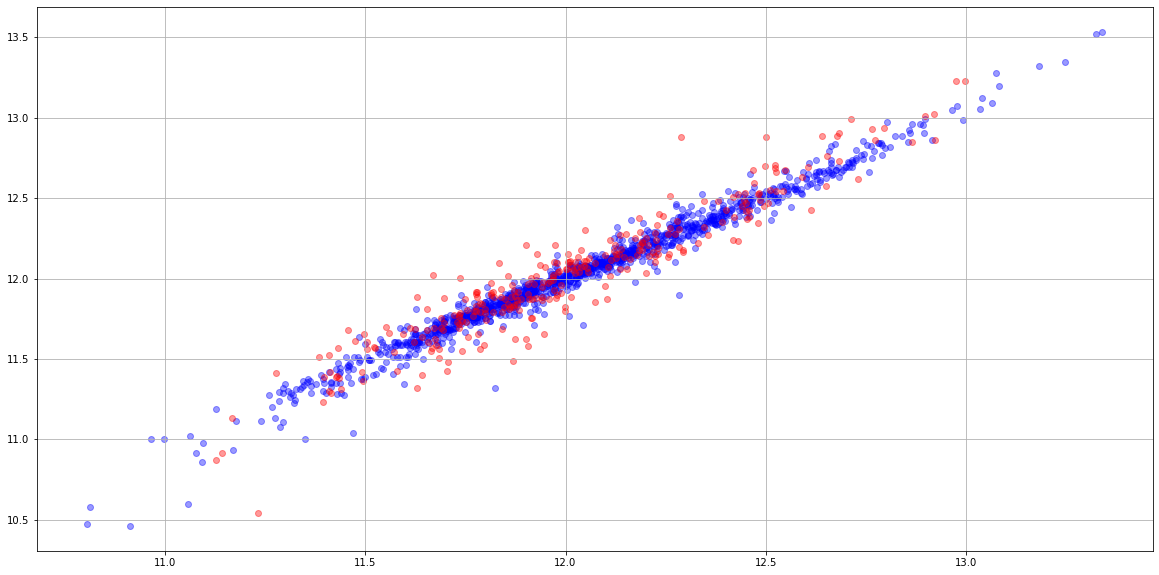

In [12]:
plt.figure(figsize=(20, 10))
plt.scatter(gs_rfr_lso.best_estimator_.predict(xtrain_rfr_lso), ytrain_rfr_lso, color='blue', alpha=0.4)
plt.scatter(gs_rfr_lso.best_estimator_.predict(xtest_rfr_lso), ytest_rfr_lso, color='red', alpha=0.4)
plt.grid(which='both')

In [13]:
train_scores = []
test_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

# parameters to use
maxdepth = [150, 200, 250, 300]
minsamlf = [1, 2, 3]
minsamsplt = [2, 3, 4]
nestimators = [300, 350, 400, 450]
oobscore = [True, False]
warmstart = [True, False]

gparam_rfr = {'max_depth': maxdepth,
              'min_samples_leaf': minsamlf,
              'min_samples_split': minsamsplt,
              'n_estimators': nestimators,
              'oob_score': oobscore,
              'warm_start': warmstart}

# setting parameters
gs_rfr_lso_1 = ms.GridSearchCV(rfr, gparam_rfr, cv=n_folds, refit=True, n_jobs=-1,
                           scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_rfr_lso_1.fit(xtrain_rfr_lso, ytrain_rfr_lso)

# setting up dataframe for results
train_scores.append(gs_rfr_lso_1.best_estimator_.score(xtrain_rfr_lso, ytrain_rfr_lso))
test_scores.append(gs_rfr_lso_1.best_estimator_.score(xtest_rfr_lso, ytest_rfr_lso))

# use rmse function from Self_Written_Functions_Sheet_Recover
train_rmse.append(rmse(gs_rfr_lso_1, ytrain_rfr_lso, xtrain_rfr_lso))
test_rmse.append(rmse(gs_rfr_lso_1, ytest_rfr_lso, xtest_rfr_lso))

# add the best parameters to the df
best_par_list.append(gs_rfr_lso_1.best_params_)

# find the difference btwn the rmses
diff_rmse = np.subtract(train_rmse, test_rmse)

# create dataframe
rfr_list_results = [train_scores, test_scores, train_rmse, test_rmse, diff_rmse]
rfr_res_df = pd.DataFrame(rfr_list_results).T
rfr_res_df.columns = ['TrainScores', 'TestScores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']
best_par_df = pd.DataFrame(best_par_list)
rfr_res_df = pd.concat([rfr_res_df, best_par_df], axis=1, sort=False)

rfr_res_df

Wall time: 5min 22s


,TrainScores,TestScores,TrainRMSE,TestRMSE,DiffRMSE,max_depth,min_samples_leaf,min_samples_split,n_estimators,oob_score,warm_start
0,0.984019,0.897102,0.050165,0.131397,-0.081232,200,1,2,350,False,False


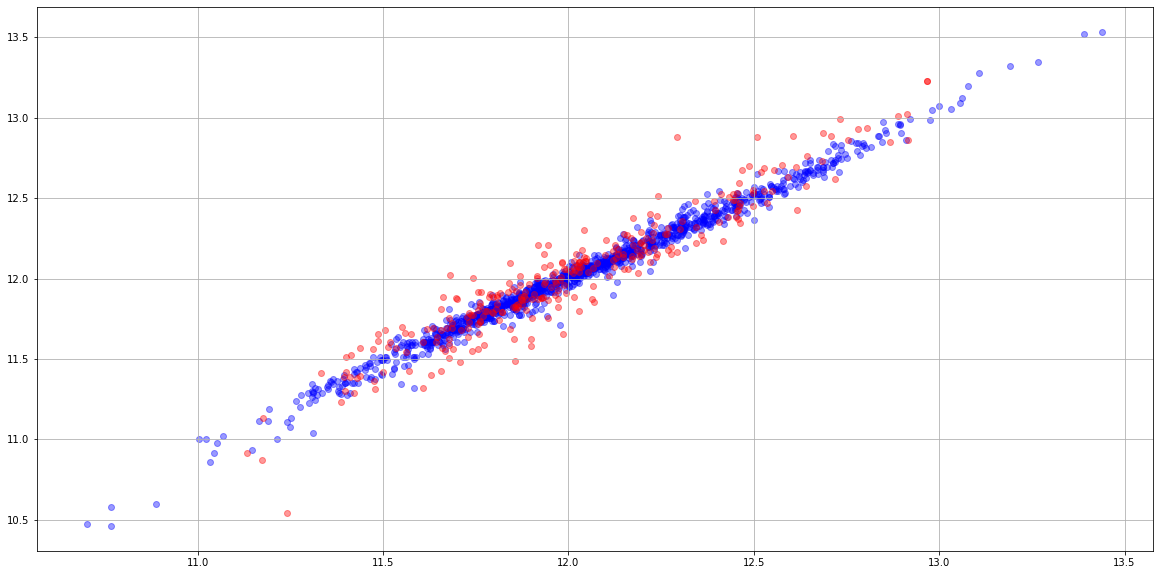

In [14]:
plt.figure(figsize=(20, 10))
plt.scatter(gs_rfr_lso_1.best_estimator_.predict(xtrain_rfr_lso), ytrain_rfr_lso, color='blue', alpha=0.4)
plt.scatter(gs_rfr_lso_1.best_estimator_.predict(xtest_rfr_lso), ytest_rfr_lso, color='red', alpha=0.4)
plt.grid(which='both')

- very little improvement and the test scores are too far apart

## Will not use Lasso reduced dataset for RFR

## Checking feature importance:

In [15]:
sorted_importance_rfr = sorted(zip(hp_full_strd.columns,
                               gs_rfr_full_2.best_estimator_.feature_importances_),
                           key=lambda t:t[1], reverse=True)
sorted_importance_rfr

[('OverallQual', 0.5337551369214248),
 ('GrLivArea', 0.10467097150053452),
 ('TotalBsmtSF', 0.04365835053575915),
 ('GarageCars', 0.04193935307009803),
 ('GarageArea', 0.03605590607686063),
 ('1stFlrSF', 0.019631943245410167),
 ('YearBuilt', 0.018858949662279557),
 ('BsmtFinTotalSF', 0.01722750823136201),
 ('BsmtFinSF1', 0.015808505689060587),
 ('CentralAir_Y', 0.01488730062449215),
 ('OverallCond', 0.012207771931293628),
 ('LotArea', 0.01108786130332365),
 ('YrsRemodToSold', 0.008686700257535743),
 ('Fireplaces', 0.007280645568383487),
 ('LotFrontage', 0.006510643400296102),
 ('YearRemodAdd', 0.005458082605759343),
 ('2ndFlrSF', 0.005180341380689927),
 ('BsmtUnfSF', 0.004834961600819795),
 ('MSZoning_RM', 0.004607309546295148),
 ('GarageType_Detchd', 0.004199816098854843),
 ('GarageFinish_Unf', 0.004191164961381945),
 ('TotalBaths', 0.003906839333018106),
 ('GarageYrBlt', 0.003715030026246605),
 ('MasVnrArea', 0.0032698703683779486),
 ('TotalPorchSF', 0.0030028864047827925),
 ('MoSold

In [16]:
filtered_sorted_importance_rfr = [x for x in sorted_importance_rfr if x[1]>0]
filtered_sorted_importance_rfr

[('OverallQual', 0.5337551369214248),
 ('GrLivArea', 0.10467097150053452),
 ('TotalBsmtSF', 0.04365835053575915),
 ('GarageCars', 0.04193935307009803),
 ('GarageArea', 0.03605590607686063),
 ('1stFlrSF', 0.019631943245410167),
 ('YearBuilt', 0.018858949662279557),
 ('BsmtFinTotalSF', 0.01722750823136201),
 ('BsmtFinSF1', 0.015808505689060587),
 ('CentralAir_Y', 0.01488730062449215),
 ('OverallCond', 0.012207771931293628),
 ('LotArea', 0.01108786130332365),
 ('YrsRemodToSold', 0.008686700257535743),
 ('Fireplaces', 0.007280645568383487),
 ('LotFrontage', 0.006510643400296102),
 ('YearRemodAdd', 0.005458082605759343),
 ('2ndFlrSF', 0.005180341380689927),
 ('BsmtUnfSF', 0.004834961600819795),
 ('MSZoning_RM', 0.004607309546295148),
 ('GarageType_Detchd', 0.004199816098854843),
 ('GarageFinish_Unf', 0.004191164961381945),
 ('TotalBaths', 0.003906839333018106),
 ('GarageYrBlt', 0.003715030026246605),
 ('MasVnrArea', 0.0032698703683779486),
 ('TotalPorchSF', 0.0030028864047827925),
 ('MoSold

In [17]:
top_filtered_sorted_importance_rfr = [x for x in filtered_sorted_importance_rfr if x[1]>0.01]
top_filtered_sorted_importance_rfr

[('OverallQual', 0.5337551369214248),
 ('GrLivArea', 0.10467097150053452),
 ('TotalBsmtSF', 0.04365835053575915),
 ('GarageCars', 0.04193935307009803),
 ('GarageArea', 0.03605590607686063),
 ('1stFlrSF', 0.019631943245410167),
 ('YearBuilt', 0.018858949662279557),
 ('BsmtFinTotalSF', 0.01722750823136201),
 ('BsmtFinSF1', 0.015808505689060587),
 ('CentralAir_Y', 0.01488730062449215),
 ('OverallCond', 0.012207771931293628),
 ('LotArea', 0.01108786130332365)]

Text(0.5, 1.0, 'Feature Importance Plot of 500-Tree GBM')

<Figure size 1440x720 with 0 Axes>

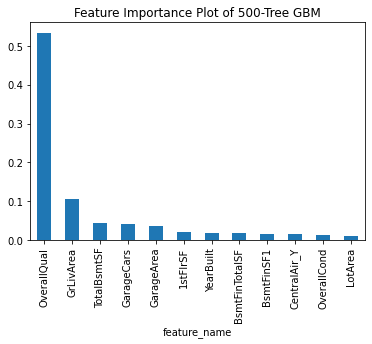

In [18]:
# Plotting the most important features
plt.figure(figsize=(20, 10))
a, b = zip(*top_filtered_sorted_importance_rfr) # this splits the list of tuples into two lists
pd.DataFrame({'feature_name':a, 'importance_score':b}).plot.bar(x='feature_name',
                                                                y='importance_score',
                                                                legend=None)
plt.title('Feature Importance Plot of 500-Tree GBM')

- BsmtFinTotalSF (column that I added) is among those that are considered most important
- Considering the expectation of some correlation/multicollinearity between BsmtFinTotalSF and a couple of other colums in the graph, it is surprising that RFR did not weed out some of them

In [19]:
# get list of column names for easier application in the future
rfr_filter_important = []
for tup in filtered_sorted_importance_rfr:
    rfr_filter_important.append(tup[0])
    
rfr_filter_important

['OverallQual',
 'GrLivArea',
 'TotalBsmtSF',
 'GarageCars',
 'GarageArea',
 '1stFlrSF',
 'YearBuilt',
 'BsmtFinTotalSF',
 'BsmtFinSF1',
 'CentralAir_Y',
 'OverallCond',
 'LotArea',
 'YrsRemodToSold',
 'Fireplaces',
 'LotFrontage',
 'YearRemodAdd',
 '2ndFlrSF',
 'BsmtUnfSF',
 'MSZoning_RM',
 'GarageType_Detchd',
 'GarageFinish_Unf',
 'TotalBaths',
 'GarageYrBlt',
 'MasVnrArea',
 'TotalPorchSF',
 'MoSold',
 'WoodDeckSF',
 'OpenPorchSF',
 'TotRmsAbvGrd',
 'KitchenAbvGr',
 'ExterCond_Fa',
 'LotShape_Reg',
 'GarageType_Attchd',
 'BsmtQual_Gd',
 'YrSold',
 'SaleCondition_Normal',
 'MSSubClass_30.0',
 'KitchenQual_Gd',
 'EnclosedPorch',
 'BedroomAbvGr',
 'KitchenQual_TA',
 'MSZoning_RL',
 'BsmtBaths',
 'Neighborhood_IDOTRR',
 'ExterQual_TA',
 'Electrical_SBrkr',
 'PavedDrive_Y',
 'HeatingQC_Fa',
 'Neighborhood_OldTown',
 'HeatingQC_TA',
 'FullBath',
 'HalfBath',
 'BsmtExposure_No',
 'Functional_Typ',
 'BsmtFinType1_GLQ',
 'BsmtExposure_Gd',
 'SaleCondition_Family',
 'BsmtQual_TA',
 'Conditio

# After Dropping Outlier for full dataset

In [20]:
hp_full_strd = hp_full_strd.drop([820])

In [21]:
state = 0

# setting up train_full and test_full sets
xtrain_rfr_drop,xtest_rfr_drop,ytrain_rfr_drop,ytest_rfr_drop = ms.train_test_split(hp_full_strd,
                                                                                   hp_logsaleprice,
                                                                                   test_size=0.2,
                                                                                   random_state=state)

# Must flatten to fit
ytrain_rfr_drop = ytrain_rfr_drop.values.flatten()

rfr = RandomForestRegressor()

# using standard kfold split
n_folds = ms.KFold(n_splits=5, random_state=state, shuffle=True)

In [22]:
train_scores = []
test_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

# parameters to use
maxdepth = [10, 25, 50, 100, 250, 500]
minsamlf = [1, 2, 3, 4, 5]
minsamsplt = [2, 3, 4, 5]
nestimators = [100, 250, 400, 500]
oobscore = [True, False]
warmstart = [True, False]

gparam_rfr = {'max_depth': maxdepth,
              'min_samples_leaf': minsamlf,
              'min_samples_split': minsamsplt,
              'n_estimators': nestimators,
              'oob_score': oobscore,
              'warm_start': warmstart}

# setting parameters
gs_rfr_drop = ms.GridSearchCV(rfr, gparam_rfr, cv=n_folds, refit=True, n_jobs=-1,
                           scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_rfr_drop.fit(xtrain_rfr_drop, ytrain_rfr_drop)

# setting up dataframe for results
train_scores.append(gs_rfr_drop.best_estimator_.score(xtrain_rfr_drop, ytrain_rfr_drop))
test_scores.append(gs_rfr_drop.best_estimator_.score(xtest_rfr_drop, ytest_rfr_drop))

# use rmse function from Self_Written_Functions_Sheet_Recover
train_rmse.append(rmse(gs_rfr_drop, ytrain_rfr_drop, xtrain_rfr_drop))
test_rmse.append(rmse(gs_rfr_drop, ytest_rfr_drop, xtest_rfr_drop))

# add the best parameters to the df
best_par_list.append(gs_rfr_drop.best_params_)

# find the difference btwn the rmses
diff_rmse = np.subtract(train_rmse, test_rmse)

# create dataframe
rfr_list_results = [train_scores, test_scores, train_rmse, test_rmse, diff_rmse]
rfr_res_df = pd.DataFrame(rfr_list_results).T
rfr_res_df.columns = ['TrainScores', 'TestScores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']
best_par_df = pd.DataFrame(best_par_list)
rfr_res_df = pd.concat([rfr_res_df, best_par_df], axis=1, sort=False)

rfr_res_df

Wall time: 23min 26s


,TrainScores,TestScores,TrainRMSE,TestRMSE,DiffRMSE,max_depth,min_samples_leaf,min_samples_split,n_estimators,oob_score,warm_start
0,0.97467,0.890609,0.063157,0.13548,-0.072323,250,2,4,100,False,True


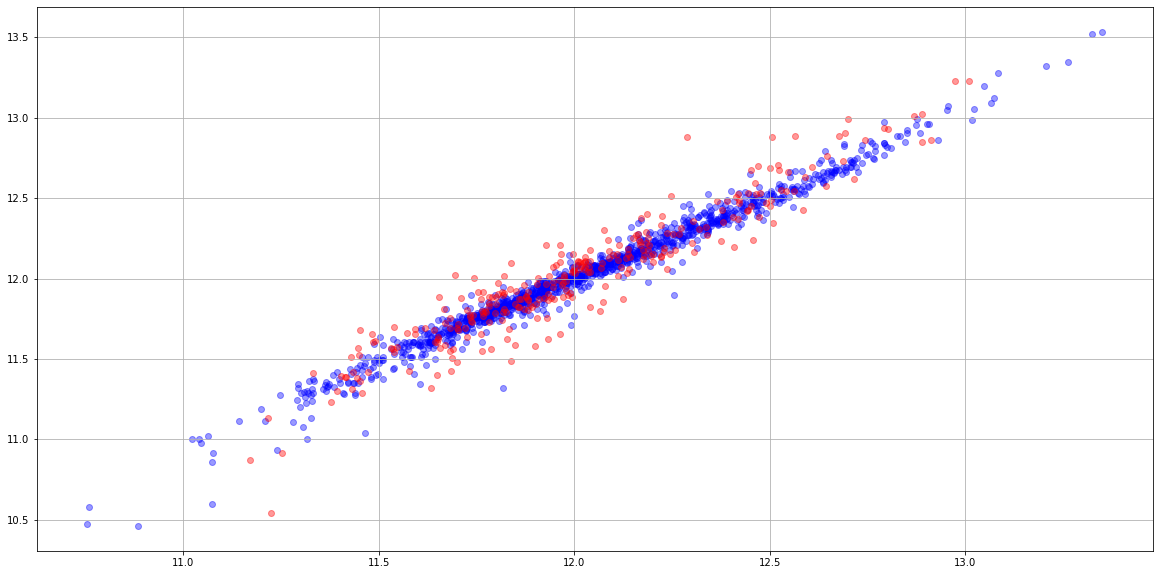

In [23]:
plt.figure(figsize=(20, 10))
plt.scatter(gs_rfr_drop.best_estimator_.predict(xtrain_rfr_drop), ytrain_rfr_drop, color='blue', alpha=0.4)
plt.scatter(gs_rfr_drop.best_estimator_.predict(xtest_rfr_drop), ytest_rfr_drop, color='red', alpha=0.4)
plt.grid(which='both')

- it seems that the outlier is needed to ensure a higher test score

## Gradient Boosting Regressions

# Using full dataset

In [24]:
# after seeing that removing the outlier causes a worse test score, will reset the data to include it
hp_full_strd = pd.read_csv('..\hp_full_strd.csv', index_col=0)
hp_logsaleprice = pd.read_csv('..\hp_logsaleprice.csv', index_col=0)

In [25]:
hp_full_strd

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,TotalBaths,BsmtBaths,BsmtFinTotalSF,BsmtUnfin,2ndFlr,LowQualFin,TotalPorchSF,Porches,Decks,YrsRemodToSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MSSubClass_20.0,MSSubClass_30.0,MSSubClass_40.0,MSSubClass_45.0,MSSubClass_50.0,MSSubClass_60.0,MSSubClass_70.0,MSSubClass_75.0,MSSubClass_80.0,MSSubClass_85.0,MSSubClass_90.0,MSSubClass_120.0,MSSubClass_1

In [26]:
state = 0

xtrain_gb_full, xtest_gb_full, ytrain_gb_full, ytest_gb_full = ms.train_test_split(hp_full_strd,
                                                                               hp_logsaleprice,
                                                                               test_size=0.2,
                                                                               random_state=state)

ytrain_gb_full = ytrain_gb_full.values.flatten()

gbm = GradientBoostingRegressor(verbose=1)

n_folds = ms.KFold(n_splits=5, random_state=state, shuffle=True)

In [27]:
train_scores = []
test_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

learningrate = [0.0001, 0.001, 0.01, 0.1, 1] # subsequently, fine tune
nestimators = [5, 10, 50, 100, 200]

maxfeatures = [9, 40, 100, 250]
maxdepth = range(1, 5)

gparam_gbm = {'learning_rate': learningrate,
              'n_estimators': nestimators, 
              'max_features': maxfeatures,
              'max_depth': maxdepth}

gs_gbm = GridSearchCV(gbm, gparam_gbm, cv=n_folds, refit=True, n_jobs=-1, 
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_gbm.fit(xtrain_gb_full, ytrain_gb_full)

# setting up dataframe for results
train_scores.append(gs_gbm.best_estimator_.score(xtrain_gb_full, ytrain_gb_full))
test_scores.append(gs_gbm.best_estimator_.score(xtest_gb_full, ytest_gb_full))

# use rmse function from Self_Written_Functions_Sheet_Recover
train_rmse.append(rmse(gs_gbm, ytrain_gb_full, xtrain_gb_full))
test_rmse.append(rmse(gs_gbm, ytest_gb_full, xtest_gb_full))

# add the best parameters to the df
best_par_list.append(gs_gbm.best_params_)

# find the difference btwn the rmses
diff_rmse = np.subtract(train_rmse, test_rmse)

# create dataframe
gbm_list_results = [train_scores, test_scores, train_rmse, test_rmse, diff_rmse]
gbm_res_df = pd.DataFrame(gbm_list_results).T
gbm_res_df.columns = ['TrainScores', 'TestScores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']
best_par_df = pd.DataFrame(best_par_list)
gbm_res_df = pd.concat([gbm_res_df, best_par_df], axis=1, sort=False)

gbm_res_df

      Iter       Train Loss   Remaining Time 
         1           0.1368            0.30s
         2           0.1210            0.30s
         3           0.1066            0.26s
         4           0.0944            0.27s
         5           0.0844            0.27s
         6           0.0751            0.28s
         7           0.0675            0.26s
         8           0.0612            0.25s
         9           0.0558            0.25s
        10           0.0510            0.25s
        20           0.0249            0.22s
        30           0.0166            0.20s
        40           0.0132            0.19s
        50           0.0113            0.18s
        60           0.0098            0.16s
        70           0.0089            0.15s
        80           0.0082            0.14s
        90           0.0077            0.13s
       100           0.0071            0.12s
       200           0.0043            0.00s
Wall time: 15.4 s


,TrainScores,TestScores,TrainRMSE,TestRMSE,DiffRMSE,learning_rate,max_depth,max_features,n_estimators
0,0.97269,0.931893,0.065501,0.107435,-0.041935,0.1,3,40,200


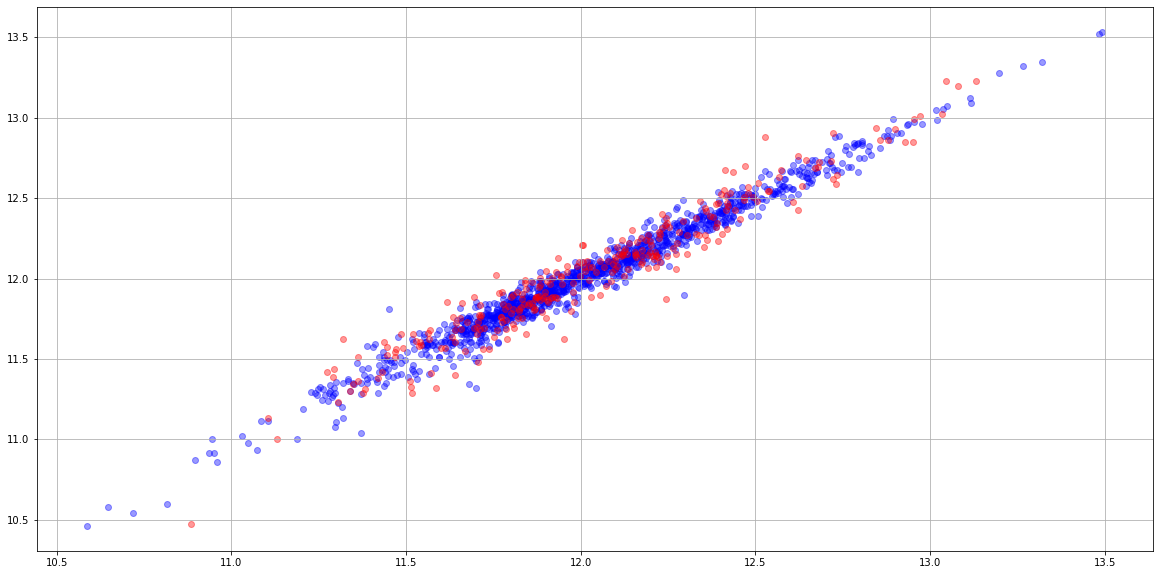

In [28]:
plt.figure(figsize=(20, 10))
plt.scatter(gs_gbm.best_estimator_.predict(xtrain_gb_full), ytrain_gb_full, color='blue', alpha=0.4)
plt.scatter(gs_gbm.best_estimator_.predict(xtest_gb_full), ytest_gb_full, color='red', alpha=0.4)
plt.grid(which='both')

In [29]:
train_scores = []
test_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

learningrate = [0.005, 0.0075, 0.01, 0.05, 0.075] # subsequently, fine tune
nestimators = [125, 150, 175, 200, 250, 300, 400, 500, 1000]

maxfeatures = [10, 20, 30, 40, 50, 60, 70, 80, 90]
maxdepth = [3, 4, 5]

gparam_gbm = {'learning_rate': learningrate,
              'n_estimators': nestimators, 
              'max_features': maxfeatures,
              'max_depth': maxdepth}

gs_gbm_1 = GridSearchCV(gbm, gparam_gbm, cv=n_folds, refit=True, n_jobs=-1, 
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_gbm_1.fit(xtrain_gb_full, ytrain_gb_full)

# setting up dataframe for results
train_scores.append(gs_gbm_1.best_estimator_.score(xtrain_gb_full, ytrain_gb_full))
test_scores.append(gs_gbm_1.best_estimator_.score(xtest_gb_full, ytest_gb_full))

# use rmse function from Self_Written_Functions_Sheet_Recover
train_rmse.append(rmse(gs_gbm_1, ytrain_gb_full, xtrain_gb_full))
test_rmse.append(rmse(gs_gbm_1, ytest_gb_full, xtest_gb_full))

# add the best parameters to the df
best_par_list.append(gs_gbm_1.best_params_)

# find the difference btwn the rmses
diff_rmse = np.subtract(train_rmse, test_rmse)

# create dataframe
gbm_list_results = [train_scores, test_scores, train_rmse, test_rmse, diff_rmse]
gbm_res_df = pd.DataFrame(gbm_list_results).T
gbm_res_df.columns = ['TrainScores', 'TestScores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']
best_par_df = pd.DataFrame(best_par_list)
gbm_res_df = pd.concat([gbm_res_df, best_par_df], axis=1, sort=False)

gbm_res_df

      Iter       Train Loss   Remaining Time 
         1           0.1488            1.00s
         2           0.1399            0.75s
         3           0.1323            0.67s
         4           0.1242            0.75s
         5           0.1172            0.70s
         6           0.1123            0.75s
         7           0.1065            0.71s
         8           0.1003            0.68s
         9           0.0954            0.72s
        10           0.0909            0.69s
        20           0.0567            0.69s
        30           0.0386            0.66s
        40           0.0289            0.65s
        50           0.0226            0.65s
        60           0.0189            0.64s
        70           0.0165            0.62s
        80           0.0147            0.62s
        90           0.0134            0.60s
       100           0.0124            0.59s
       200           0.0078            0.52s
       300           0.0060            0.45s
       40

,TrainScores,TestScores,TrainRMSE,TestRMSE,DiffRMSE,learning_rate,max_depth,max_features,n_estimators
0,0.987399,0.935281,0.044492,0.104729,-0.060237,0.05,3,20,1000


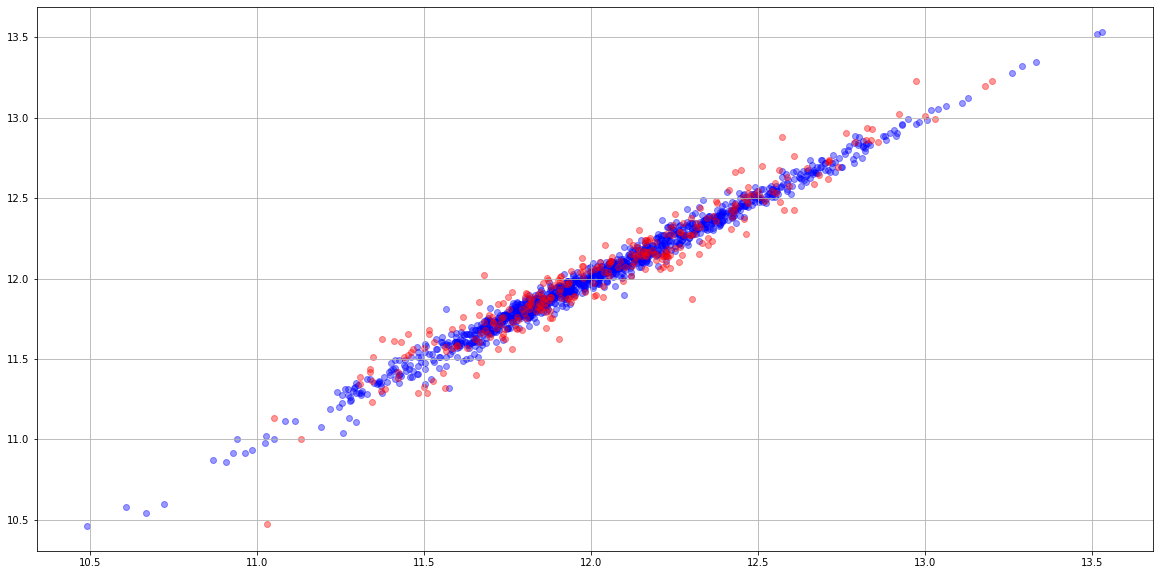

In [30]:
plt.figure(figsize=(20, 10))
plt.scatter(gs_gbm_1.best_estimator_.predict(xtrain_gb_full), ytrain_gb_full, color='blue', alpha=0.4)
plt.scatter(gs_gbm_1.best_estimator_.predict(xtest_gb_full), ytest_gb_full, color='red', alpha=0.4)
plt.grid(which='both')

In [31]:
train_scores = []
test_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

n_folds = ms.KFold(n_splits=5, random_state=state, shuffle=True)

learningrate = [0.041, 0.042, 0.043, 0.044] # subsequently, fine tune
nestimators = [391, 392, 393, 394, 395, 396, 397, 398, 399, 400]
maxfeatures = [21]
maxdepth = [4]

gparam_gbm = {'learning_rate': learningrate,
              'n_estimators': nestimators, 
              'max_features': maxfeatures,
              'max_depth': maxdepth}

gs_gbm_5 = GridSearchCV(gbm, gparam_gbm, cv=n_folds, refit=True, n_jobs=-1, 
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_gbm_5.fit(xtrain_gb_full, ytrain_gb_full)

# setting up dataframe for results
train_scores.append(gs_gbm_5.best_estimator_.score(xtrain_gb_full, ytrain_gb_full))
test_scores.append(gs_gbm_5.best_estimator_.score(xtest_gb_full, ytest_gb_full))

# use rmse function from Self_Written_Functions_Sheet_Recover
train_rmse.append(rmse(gs_gbm_5, ytrain_gb_full, xtrain_gb_full))
test_rmse.append(rmse(gs_gbm_5, ytest_gb_full, xtest_gb_full))

# add the best parameters to the df
best_par_list.append(gs_gbm_5.best_params_)

# find the difference btwn the rmses
diff_rmse = np.subtract(train_rmse, test_rmse)

# create dataframe
gbm_list_results = [train_scores, test_scores, train_rmse, test_rmse, diff_rmse]
gbm_res_df = pd.DataFrame(gbm_list_results).T
gbm_res_df.columns = ['TrainScores', 'TestScores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']
best_par_df = pd.DataFrame(best_par_list)
gbm_res_df = pd.concat([gbm_res_df, best_par_df], axis=1, sort=False)

gbm_res_df

      Iter       Train Loss   Remaining Time 
         1           0.1490            0.40s
         2           0.1403            0.40s
         3           0.1338            0.40s
         4           0.1268            0.40s
         5           0.1199            0.40s
         6           0.1138            0.39s
         7           0.1078            0.39s
         8           0.1023            0.39s
         9           0.0968            0.37s
        10           0.0920            0.37s
        20           0.0571            0.34s
        30           0.0376            0.33s
        40           0.0265            0.32s
        50           0.0201            0.30s
        60           0.0161            0.29s
        70           0.0135            0.28s
        80           0.0116            0.27s
        90           0.0101            0.26s
       100           0.0092            0.26s
       200           0.0052            0.17s
       300           0.0037            0.08s
       40

,TrainScores,TestScores,TrainRMSE,TestRMSE,DiffRMSE,learning_rate,max_depth,max_features,n_estimators
0,0.982023,0.928242,0.053143,0.110277,-0.057134,0.042,4,21,400


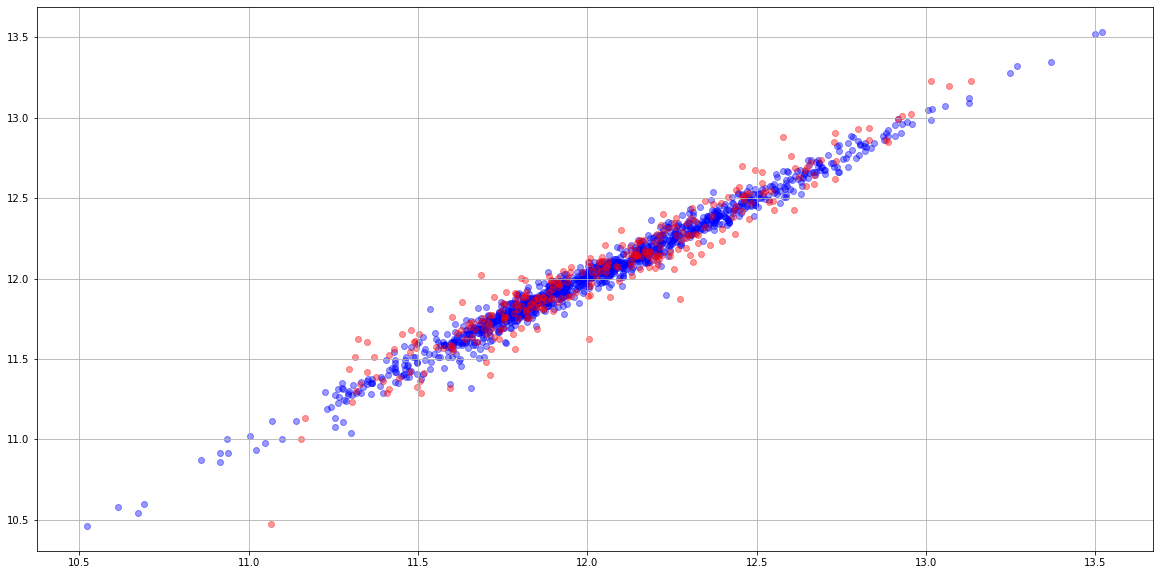

In [32]:
plt.figure(figsize=(20, 10))
plt.scatter(gs_gbm_5.best_estimator_.predict(xtrain_gb_full), ytrain_gb_full, color='blue', alpha=0.4)
plt.scatter(gs_gbm_5.best_estimator_.predict(xtest_gb_full), ytest_gb_full, color='red', alpha=0.4)
plt.grid(which='both')

## Attempting Gradient Boosting with reduced dataset

In [33]:
hp_rfr_fltr = hp_full_strd[rfr_filter_important]
hp_rfr_fltr.to_csv('..\hp_rfr_fltr.csv')
hp_rfr_fltr

,OverallQual,GrLivArea,TotalBsmtSF,GarageCars,GarageArea,1stFlrSF,YearBuilt,BsmtFinTotalSF,BsmtFinSF1,CentralAir_Y,OverallCond,LotArea,YrsRemodToSold,Fireplaces,LotFrontage,YearRemodAdd,2ndFlrSF,BsmtUnfSF,MSZoning_RM,GarageType_Detchd,GarageFinish_Unf,TotalBaths,GarageYrBlt,MasVnrArea,TotalPorchSF,MoSold,WoodDeckSF,OpenPorchSF,TotRmsAbvGrd,KitchenAbvGr,ExterCond_Fa,LotShape_Reg,GarageType_Attchd,BsmtQual_Gd,YrSold,SaleCondition_Normal,MSSubClass_30.0,KitchenQual_Gd,EnclosedPorch,BedroomAbvGr,KitchenQual_TA,MSZoning_RL,BsmtBaths,Neighborhood_IDOTRR,ExterQual_TA,Electrical_SBrkr,PavedDrive_Y,HeatingQC_Fa,Neighborhood_OldTown,HeatingQC_TA,FullBath,HalfBath,BsmtExposure_No,Functional_Typ,BsmtFinType1_GLQ,BsmtExposure_Gd,SaleCondition_Family,BsmtQual_TA,Condition1_Norm,RoofStyle_Hip,LandContour_Lvl,Neighborhood_NAmes,GarageFinish_RFn,ExterCond_TA,Neighborhood_Crawfor,Exterior1st_VinylSd,Exterior2nd_VinylSd,MSSubClass_60.0,LotConfig_Inside,Neighborhood_Edwards,RoofStyle_Gable,Foundation_PConc,FireplaceQu_Gd,BsmtFinType1_Unf,HeatingQC_Gd,ExterQual_Gd,ExterQual_Fa,Foundation_CBlock,BsmtFullBath,Exterior1st_Wd Sdng,Exterior1st_MetalSd,LandSlope_Mod,MSSubClass_50.0,ScreenPorch,MSSubClass_20.0,BsmtCond_TA,Heating_Grav,Exterior2nd_MetalSd,SaleType_WD,Neighborhood_NWAmes,Neighborhood_Sawyer,Exterior1st_BrkFace,Condition1_Feedr,BsmtFinType1_Rec,MasVnrType_BrkFace,FireplaceQu_TA,Porches,SaleType_New,Exterior2nd_Plywood,HouseStyle_2Story,SaleCondition_Partial,Decks,BsmtFinSF2,MiscVal,MasVnrType_Stone,FireplaceQu_Po,ExterCond_Gd,GarageType_CarPort,Exterior1st_HdBoard,GarageQual_Fa,GarageQual_TA,BsmtQual_Fa,HouseStyle_1Story,Neighborhood_CollgCr,Neighborhood_BrkSide,Exterior2nd_Wd Sdng,MSSubClass_80.0,BsmtFinType1_BLQ,BsmtHalfBath,KitchenQual_Fa,Neighborhood_NoRidge,Exterior1st_Plywood,Functional_Maj2,BsmtFinType2_BLQ,PavedDrive_P,Neighborhood_Somerst,Exterior2nd_HdBoard,LotConfig_CulDSac,BsmtExposure_Mn,BsmtUnfin,RoofStyle_Gambrel,MasVnrType_None,LandContour_HLS,Functional_Mod,Functional_Min2,2ndFlr,GarageCond_Fa,BsmtFinType1_LwQ,Neighborhood_ClearCr,Heating_GasA,MSSubClass_160.0,Exterior1st_CemntBd,GarageType_BuiltIn,Neighborhood_NridgHt,LowQualFinSF,MSSubClass_70.0,Condition2_Norm,Electrical_FuseF,MSSubClass_90.0,BldgType_Duplex,Exterior2nd_BrkFace,HouseStyle_SLvl,Exterior2nd_CmentBd,Neighborhood_Gilbert,Neighborhood_StoneBr,Neighborhood_Mitchel,Neighborhood_MeadowV,BldgType_TwnhsE,GarageCond_TA,MSZoning_FV,BsmtFinType2_Unf,LandContour_Low,LotShape_IR2,Functional_Min1,Neighborhood_Timber,LowQualFin,HouseStyle_2.5Unf,Exterior2nd_Wd Shng,BsmtFinType2_LwQ,LotConfig_FR2,Exterior2nd_Stucco,Neighborhood_SawyerW,MSSubClass_120.0,Foundation_Slab,BldgType_Twnhs,Exterior1st_Stucco,BldgType_2fmCon,Neighborhood_SWISU,BsmtCond_Gd,MSSubClass_190.0,FireplaceQu_Fa,Condition1_PosA,LandSlope_Sev,MSZoning_RH,3SsnPorch,SaleType_ConLD,GarageType_Basment,BsmtFinType2_Rec,Condition1_RRAn,HouseStyle_SFoyer,GarageQual_Po,Heating_GasW,Neighborhood_NPkVill,Street_Pave,Neighborhood_Veenker,RoofMatl_Tar&Grv,Condition1_RRAe,LotShape_IR3,Exterior1st_WdShing,Condition1_PosN,HouseStyle_2.5Fin,Exterior1st_BrkComm,RoofMatl_WdShake,Exterior2nd_Brk Cmn,Neighborhood_BrDale,BsmtFinType2_GLQ,MSSubClass_85.0,MSSubClass_75.0,HouseStyle_1.5Unf,SaleCondition_Alloca,MSSubClass_45.0,GarageQual_Gd,SaleType_Oth,Foundation_Stone,GarageCond_Po,SaleType_ConLw,Exterior2nd_Stone,BsmtCond_Po,Heating_Wall,GarageCond_Gd
0,0.029344,0.028104,0.019815,0.027315,0.027731,0.018420,0.026608,0.027808,0.029998,1.0,0.023029,0.015398,0.004240,0.000000,0.023186,0.026427,0.040234,0.005464,0.0,0.0,0.0,0.035089,0.026512,0.024858,0.011747,0.007619,0.000000,0.019967,0.031232,0.024485,0.0,1.0,1.0,1.0,0.026192,1.0,0.0,1.0,0.000000,0.026364,0.0,1.0,0.038264,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.031599,0.041487,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.039163,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.031623,0.0,0.0,1.0,0.0,0.000000,0.

In [34]:
state = 0

xtrain_rfr_fltr, xtest_rfr_fltr, ytrain_rfr_fltr, ytest_rfr_fltr = ms.train_test_split(hp_rfr_fltr,
                                                                               hp_logsaleprice,
                                                                               test_size=0.2,
                                                                               random_state=state)

ytrain_rfr_fltr = ytrain_rfr_fltr.values.flatten()

gbm = GradientBoostingRegressor(verbose=1)

n_folds = ms.KFold(n_splits=5, random_state=state, shuffle=True)

In [35]:
train_scores = []
test_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

learningrate = [0.0001, 0.001, 0.01, 0.1, 1] # subsequently, fine tune
nestimators = [5, 10, 50, 100, 200]

maxfeatures = [9, 40, 100, 150, 200]
maxdepth = range(1, 5)

gparam_gbm = {'learning_rate': learningrate,
              'n_estimators': nestimators, 
              'max_features': maxfeatures,
              'max_depth': maxdepth}

gs_gbm_rfrfltr = GridSearchCV(gbm, gparam_gbm, cv=n_folds, refit=True, n_jobs=-1, 
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_gbm_rfrfltr.fit(xtrain_rfr_fltr, ytrain_rfr_fltr)

# setting up dataframe for results
train_scores.append(gs_gbm_rfrfltr.best_estimator_.score(xtrain_rfr_fltr, ytrain_rfr_fltr))
test_scores.append(gs_gbm_rfrfltr.best_estimator_.score(xtest_rfr_fltr, ytest_rfr_fltr))

# use rmse function from Self_Written_Functions_Sheet_Recover
train_rmse.append(rmse(gs_gbm_rfrfltr, ytrain_rfr_fltr, xtrain_rfr_fltr))
test_rmse.append(rmse(gs_gbm_rfrfltr, ytest_rfr_fltr, xtest_rfr_fltr))

# add the best parameters to the df
best_par_list.append(gs_gbm_rfrfltr.best_params_)

# find the difference btwn the rmses
diff_rmse = np.subtract(train_rmse, test_rmse)

# create dataframe
gbm_list_results = [train_scores, test_scores, train_rmse, test_rmse, diff_rmse]
gbm_res_df = pd.DataFrame(gbm_list_results).T
gbm_res_df.columns = ['TrainScores', 'TestScores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']
best_par_df = pd.DataFrame(best_par_list)
gbm_res_df = pd.concat([gbm_res_df, best_par_df], axis=1, sort=False)

gbm_res_df

      Iter       Train Loss   Remaining Time 
         1           0.1382            0.20s
         2           0.1212            0.25s
         3           0.1073            0.26s
         4           0.0952            0.25s
         5           0.0849            0.23s
         6           0.0768            0.24s
         7           0.0685            0.25s
         8           0.0618            0.24s
         9           0.0555            0.24s
        10           0.0501            0.25s
        20           0.0240            0.22s
        30           0.0158            0.20s
        40           0.0125            0.19s
        50           0.0105            0.18s
        60           0.0093            0.17s
        70           0.0084            0.16s
        80           0.0077            0.15s
        90           0.0072            0.13s
       100           0.0068            0.12s
       200           0.0041            0.00s
Wall time: 19.2 s


,TrainScores,TestScores,TrainRMSE,TestRMSE,DiffRMSE,learning_rate,max_depth,max_features,n_estimators
0,0.973817,0.927643,0.064135,0.110737,-0.046602,0.1,3,40,200


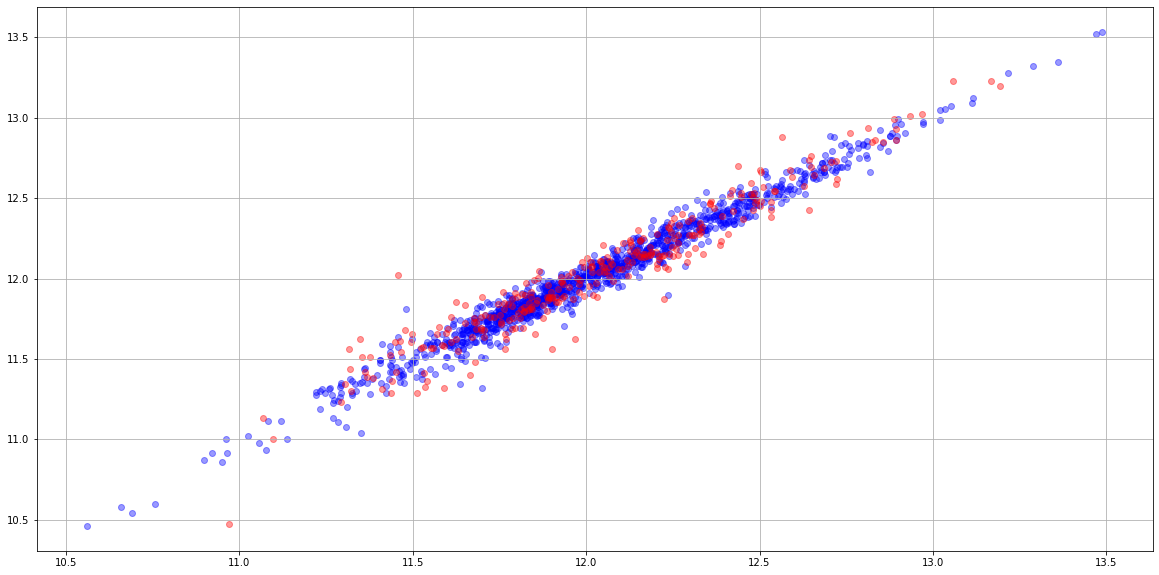

In [36]:
plt.figure(figsize=(20, 10))
plt.scatter(gs_gbm_rfrfltr.best_estimator_.predict(xtrain_rfr_fltr), ytrain_rfr_fltr, color='blue', alpha=0.4)
plt.scatter(gs_gbm_rfrfltr.best_estimator_.predict(xtest_rfr_fltr), ytest_rfr_fltr, color='red', alpha=0.4)
plt.grid(which='both')

In [37]:
train_scores = []
test_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

learningrate = [0.08, 0.09, 0.1, 0.11, 0.12] # subsequently, fine tune
nestimators = [176, 178, 180, 182, 184, 186, 188]

maxfeatures = [22, 24, 26, 28, 30, 32, 34, 36, 38]
maxdepth = [1, 2, 3, 4]

gparam_gbm = {'learning_rate': learningrate,
              'n_estimators': nestimators, 
              'max_features': maxfeatures,
              'max_depth': maxdepth}

gs_gbm_rfrfltr_2 = GridSearchCV(gbm, gparam_gbm, cv=n_folds, refit=True, n_jobs=-1, 
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_gbm_rfrfltr_2.fit(xtrain_rfr_fltr, ytrain_rfr_fltr)

# setting up dataframe for results
train_scores.append(gs_gbm_rfrfltr_2.best_estimator_.score(xtrain_rfr_fltr, ytrain_rfr_fltr))
test_scores.append(gs_gbm_rfrfltr_2.best_estimator_.score(xtest_rfr_fltr, ytest_rfr_fltr))

# use rmse function from Self_Written_Functions_Sheet_Recover
train_rmse.append(rmse(gs_gbm_rfrfltr_2, ytrain_rfr_fltr, xtrain_rfr_fltr))
test_rmse.append(rmse(gs_gbm_rfrfltr_2, ytest_rfr_fltr, xtest_rfr_fltr))

# add the best parameters to the df
best_par_list.append(gs_gbm_rfrfltr_2.best_params_)

# find the difference btwn the rmses
diff_rmse = np.subtract(train_rmse, test_rmse)

# create dataframe
gbm_list_results = [train_scores, test_scores, train_rmse, test_rmse, diff_rmse]
gbm_res_df = pd.DataFrame(gbm_list_results).T
gbm_res_df.columns = ['TrainScores', 'TestScores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']
best_par_df = pd.DataFrame(best_par_list)
gbm_res_df = pd.concat([gbm_res_df, best_par_df], axis=1, sort=False)

gbm_res_df

      Iter       Train Loss   Remaining Time 
         1           0.1396            0.18s
         2           0.1237            0.18s
         3           0.1092            0.21s
         4           0.0983            0.20s
         5           0.0879            0.19s
         6           0.0794            0.19s
         7           0.0719            0.20s
         8           0.0643            0.19s
         9           0.0585            0.19s
        10           0.0531            0.20s
        20           0.0249            0.18s
        30           0.0164            0.17s
        40           0.0128            0.16s
        50           0.0106            0.15s
        60           0.0094            0.14s
        70           0.0086            0.13s
        80           0.0080            0.12s
        90           0.0075            0.10s
       100           0.0069            0.09s
Wall time: 43.2 s


,TrainScores,TestScores,TrainRMSE,TestRMSE,DiffRMSE,learning_rate,max_depth,max_features,n_estimators
0,0.971169,0.92767,0.0673,0.110716,-0.043416,0.1,3,36,180


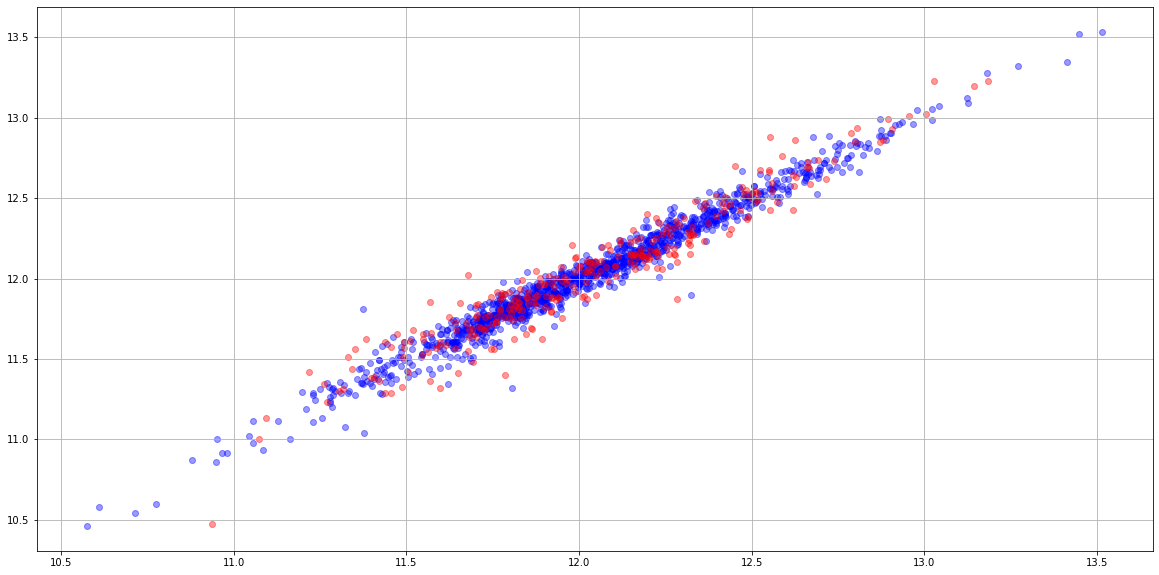

In [38]:
plt.figure(figsize=(20, 10))
plt.scatter(gs_gbm_rfrfltr_2.best_estimator_.predict(xtrain_rfr_fltr), ytrain_rfr_fltr, color='blue', alpha=0.4)
plt.scatter(gs_gbm_rfrfltr_2.best_estimator_.predict(xtest_rfr_fltr), ytest_rfr_fltr, color='red', alpha=0.4)
plt.grid(which='both')

In [39]:
hp_full_strd

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,TotalBaths,BsmtBaths,BsmtFinTotalSF,BsmtUnfin,2ndFlr,LowQualFin,TotalPorchSF,Porches,Decks,YrsRemodToSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MSSubClass_20.0,MSSubClass_30.0,MSSubClass_40.0,MSSubClass_45.0,MSSubClass_50.0,MSSubClass_60.0,MSSubClass_70.0,MSSubClass_75.0,MSSubClass_80.0,MSSubClass_85.0,MSSubClass_90.0,MSSubClass_120.0,MSSubClass_1